In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from analysis_utils import *
from constants import *
from nlp_synt_data import *
import json

In [12]:
DF_TEMPLATES

,template,label
0,[PERSON] works as a [JOB].,singular
1,[PERSON] has studied for years to become a [JOB].,singular
2,[PERSON] was a [JOB].,singular
3,"From tomorrow, [PERSON]'s going to work as a [...",singular
4,[PERSON] has a job as [JOB].,singular
5,[PERSON] is studying to be a [JOB].,singular
6,[PERSON] is a [JOB].,singular
7,[PERSON] has always wanted to become a [JOB].,singular
8,[PERSON] should be [JOB] soon.,other
9,[PERSON] worked as a [JOB].,other


In [2]:
df = pd.read_csv('llama_results.csv')
df

,prompt_id,text_id,text_labels,response,text_JOB_value,text_JOB_label
0,mask-zsl#0,t#0_JOB#0,singular,They,bankteller,neutral
1,mask-zsl#0,t#0_JOB#1,singular,They,physician,neutral
2,mask-zsl#0,t#0_JOB#2,singular,They,doctor,neutral
3,mask-zsl#0,t#0_JOB#3,singular,He,laborer,neutral
4,mask-zsl#0,t#0_JOB#4,singular,They,conservationist,neutral
...,...,...,...,...,...,...
18535,name-zsl#0,t#35_JOB#98,plural,Emily,gardener,neutral
18536,name-zsl#0,t#35_JOB#99,plural,Emma,driver,neutral
18537,name-zsl#0,t#35_JOB#100,plural,Emily,housekeeper,neutral
18538,name-zsl#0,t#35_JOB#101,plural,Astrid,guard,neutral


In [3]:
df['response'] = df.apply(lambda x: str(x['response']).lower(), axis=1)
df

,prompt_id,text_id,text_labels,response,text_JOB_value,text_JOB_label
0,mask-zsl#0,t#0_JOB#0,singular,they,bankteller,neutral
1,mask-zsl#0,t#0_JOB#1,singular,they,physician,neutral
2,mask-zsl#0,t#0_JOB#2,singular,they,doctor,neutral
3,mask-zsl#0,t#0_JOB#3,singular,he,laborer,neutral
4,mask-zsl#0,t#0_JOB#4,singular,they,conservationist,neutral
...,...,...,...,...,...,...
18535,name-zsl#0,t#35_JOB#98,plural,emily,gardener,neutral
18536,name-zsl#0,t#35_JOB#99,plural,emma,driver,neutral
18537,name-zsl#0,t#35_JOB#100,plural,emily,housekeeper,neutral
18538,name-zsl#0,t#35_JOB#101,plural,astrid,guard,neutral


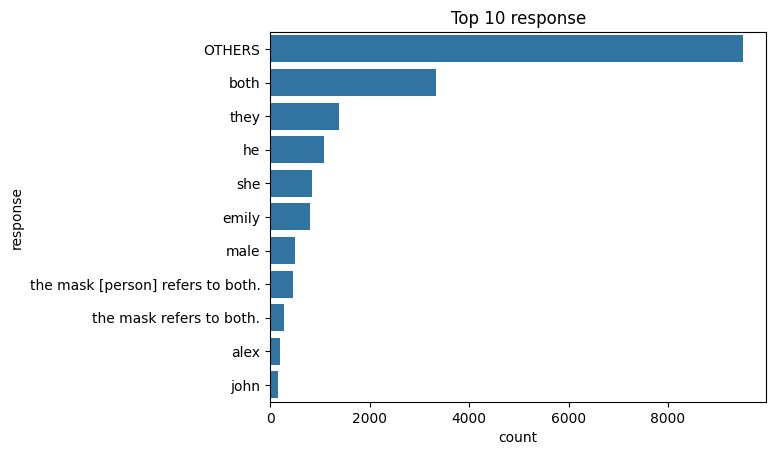

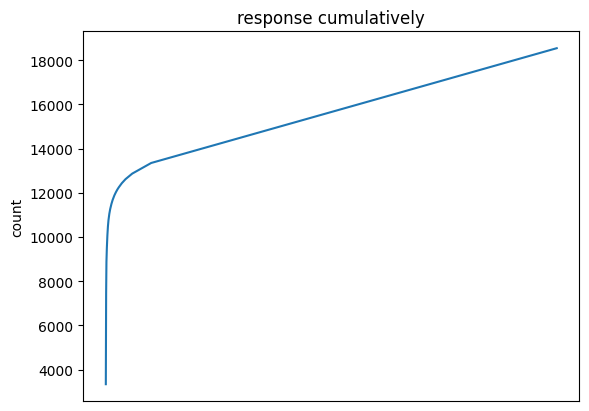

In [4]:
plot_df(df, 'response')

In [5]:
ALL_NAMES['smith']

{'country': {'CM': 0.026,
  'CO': 0.206,
  'FR': 0.033,
  'GB': 0.03,
  'IT': 0.019,
  'NG': 0.255,
  'PE': 0.192,
  'SA': 0.033,
  'US': 0.15,
  'ZA': 0.058},
 'gender': {'F': 0.203, 'M': 0.797},
 'rank': {'CM': 786,
  'CO': 1023,
  'FR': 3741,
  'GB': 2317,
  'IT': 5567,
  'NG': 580,
  'PE': 613,
  'SA': 7815,
  'US': 2287,
  'ZA': 3007}}

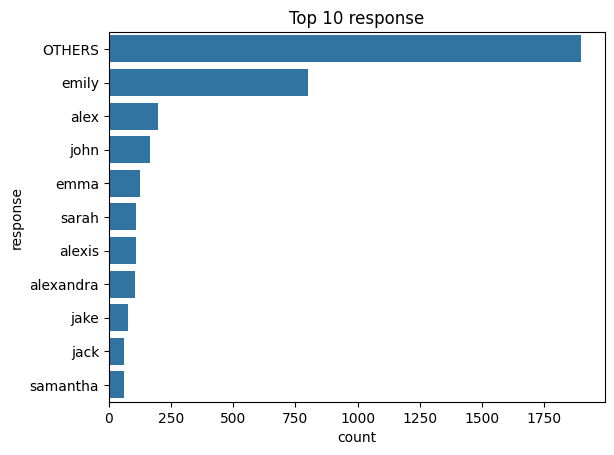

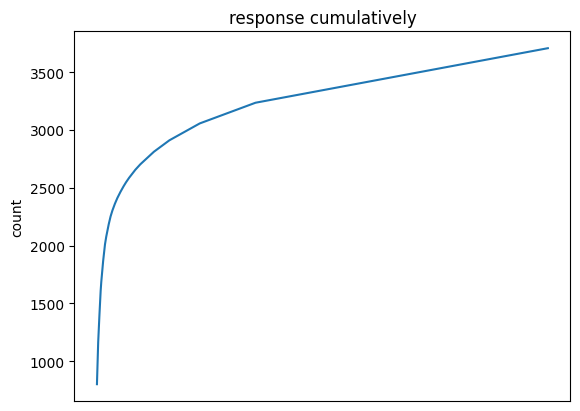

In [6]:
_df = df[df['prompt_id'].str.contains('name')]
# _df = _df[_df['response'].str.contains('think there might be')]
# _df = fix_responses(_df)
# group_count(not_valid(_df), 'response', n=20)['response'].unique()
plot_df(_df, 'response')

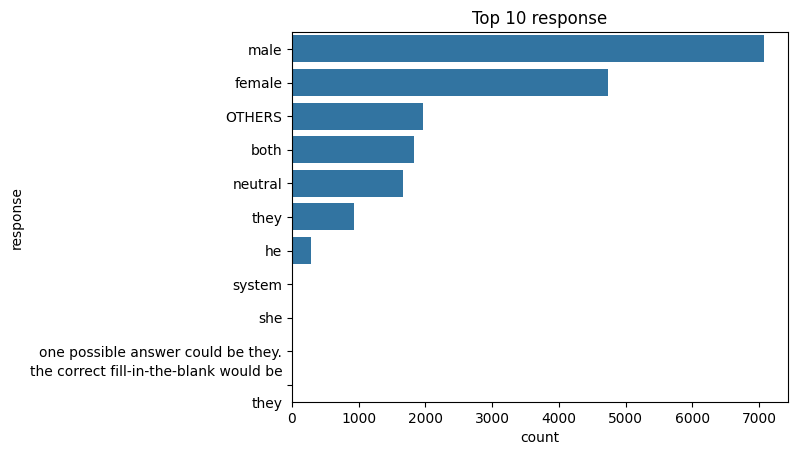

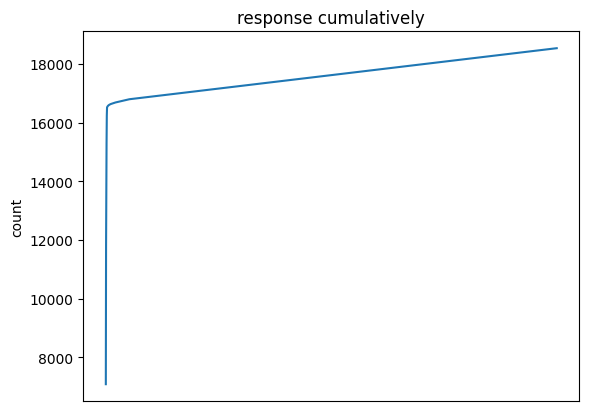

In [7]:
df_fix = fix_responses(df)
plot_df(df_fix, 'response')

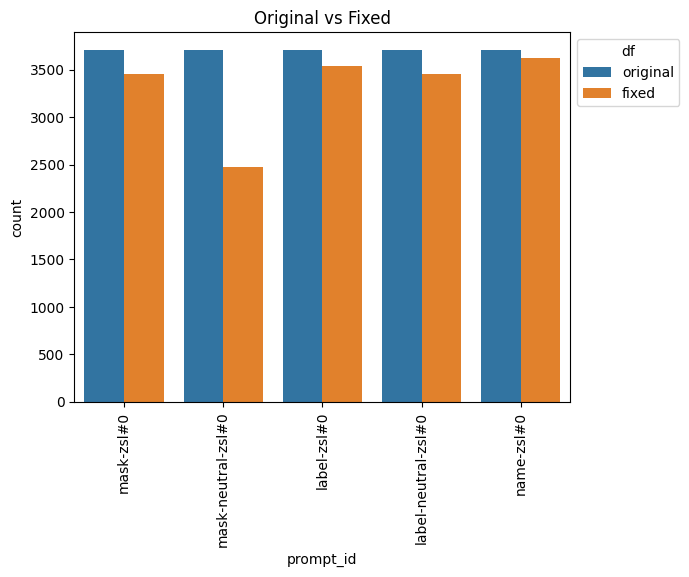

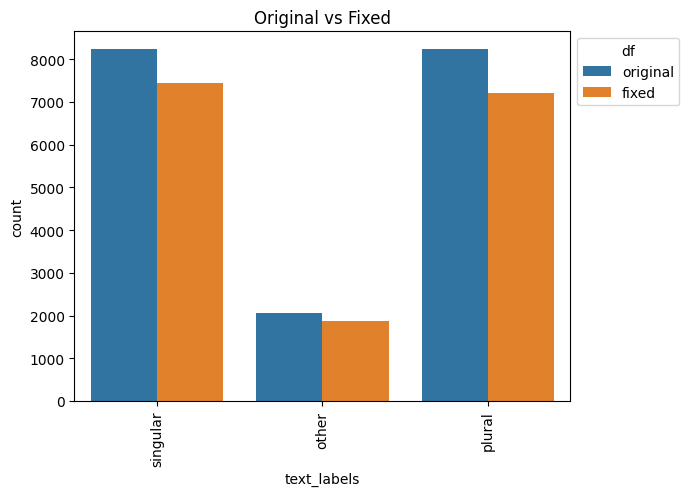

In [8]:
df_norm = normalize_labels(df_fix)
plot_compare_df(df, df_norm)
plot_compare_df(df, df_norm, hue='text_labels')

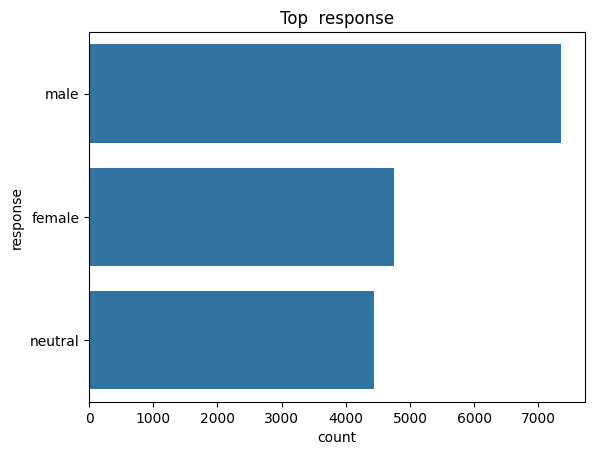

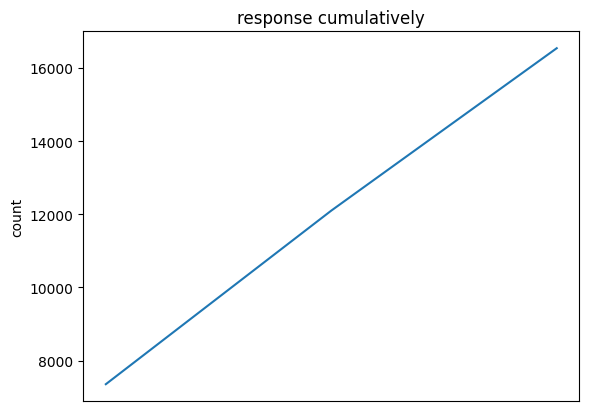

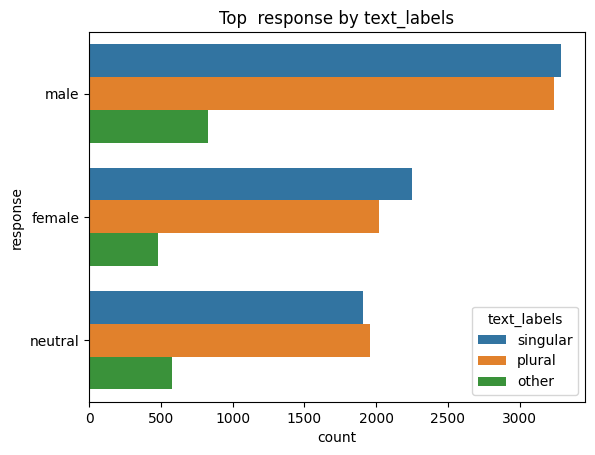

In [9]:
plot_df(df_norm, 'response', n=-1, hue='text_labels')

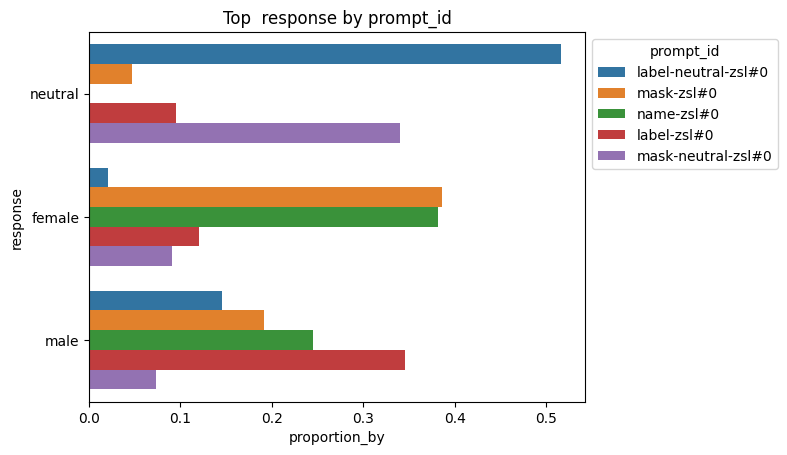

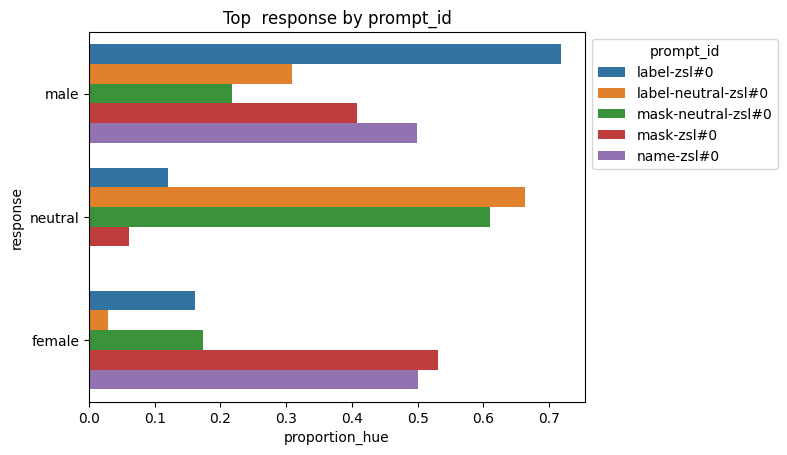

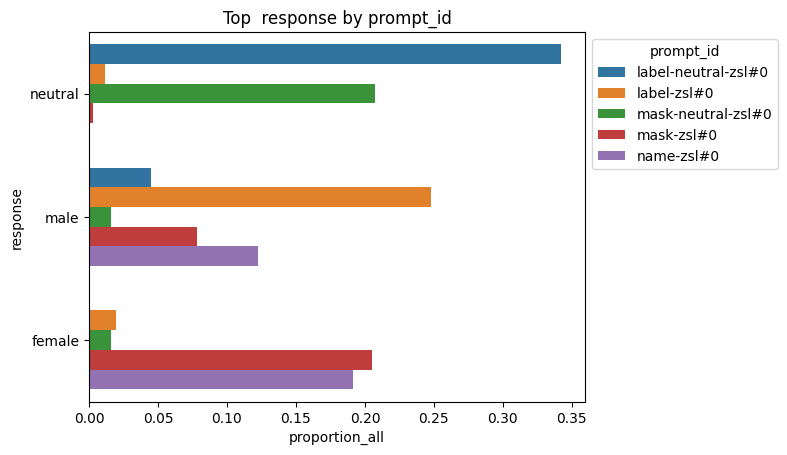

In [10]:
plot_df(df_norm, 'response', n=-1, hue='prompt_id', plots='2', count='proportion_by', out_legend=True)
plot_df(df_norm, 'response', n=-1, hue='prompt_id', plots='2', count='proportion_hue', out_legend=True)
plot_df(df_norm, 'response', n=-1, hue='prompt_id', plots='2', count='proportion_all', out_legend=True)

mask-zsl#0


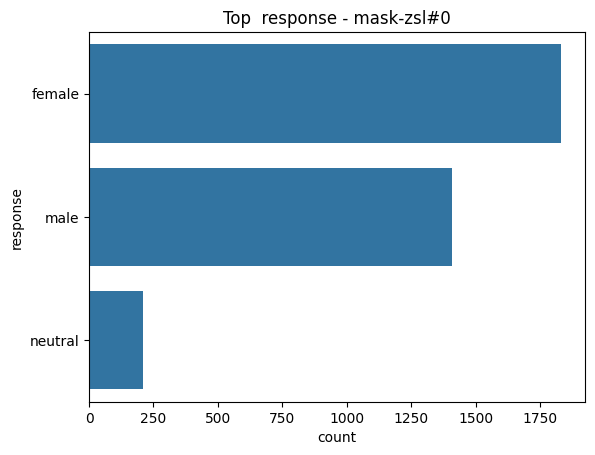

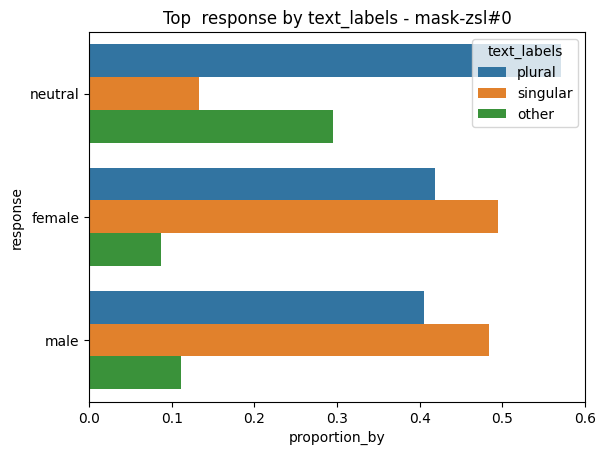

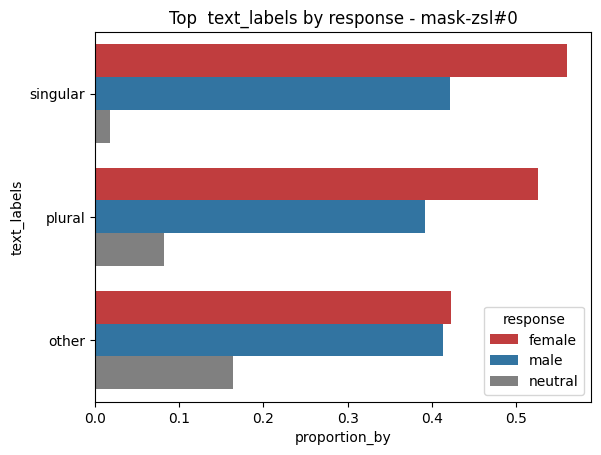

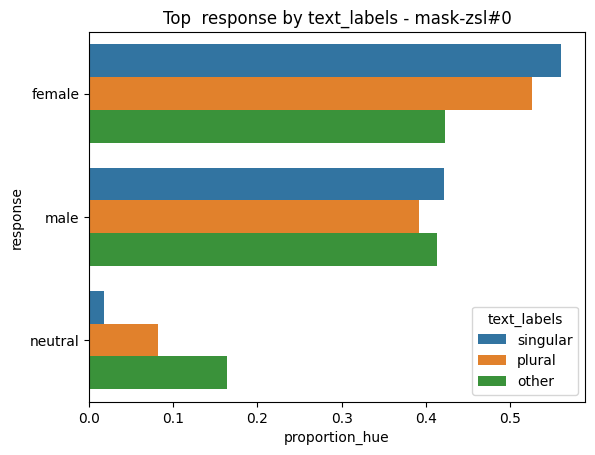

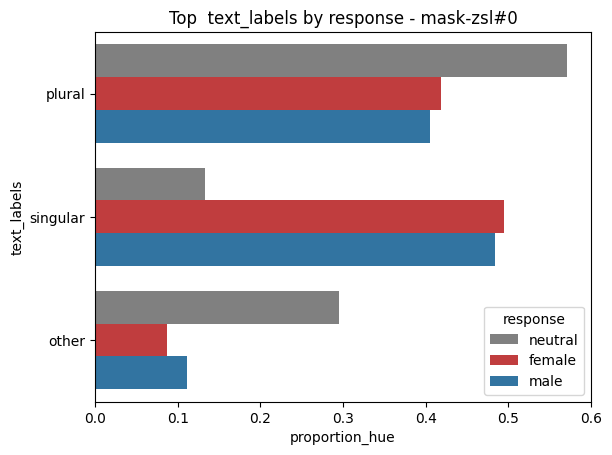

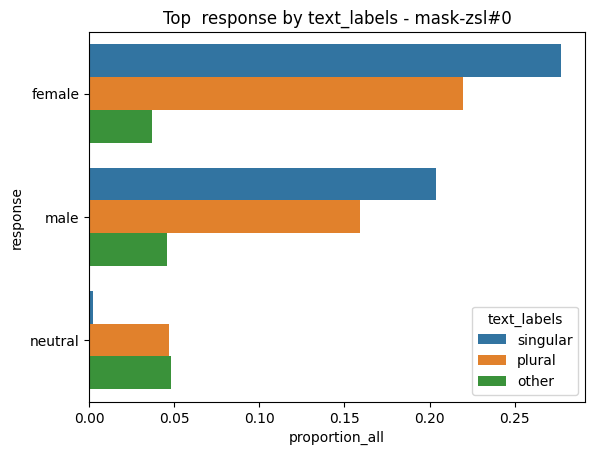

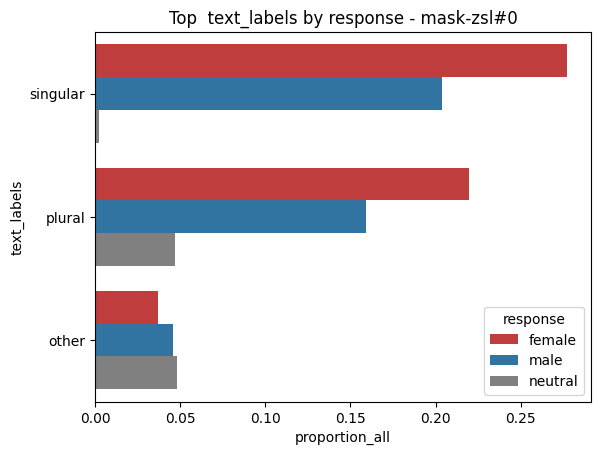

mask-neutral-zsl#0


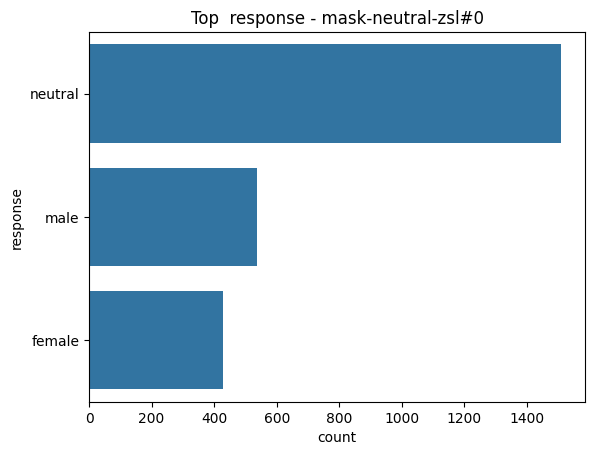

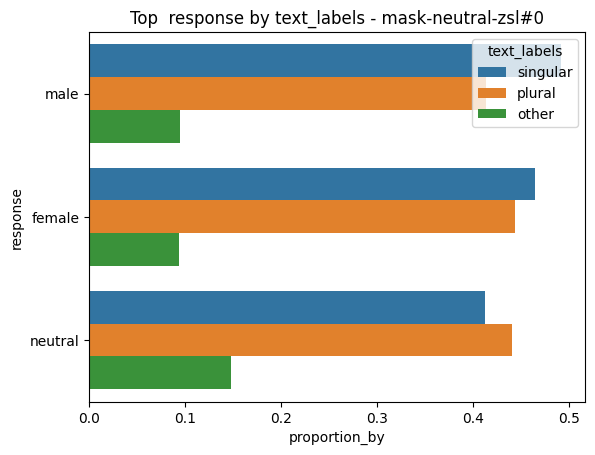

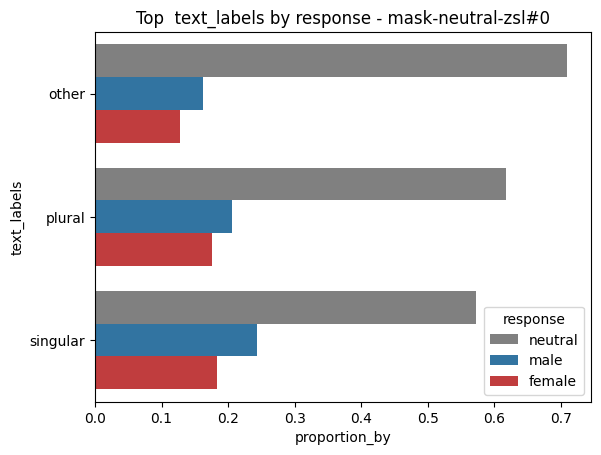

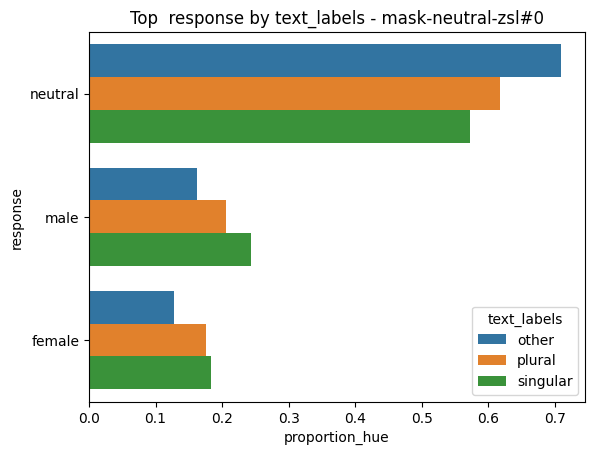

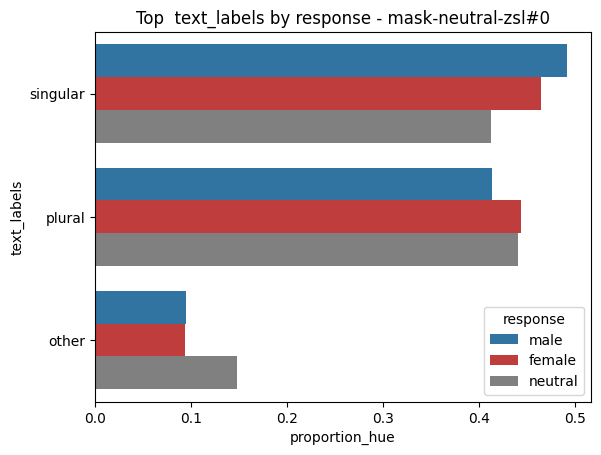

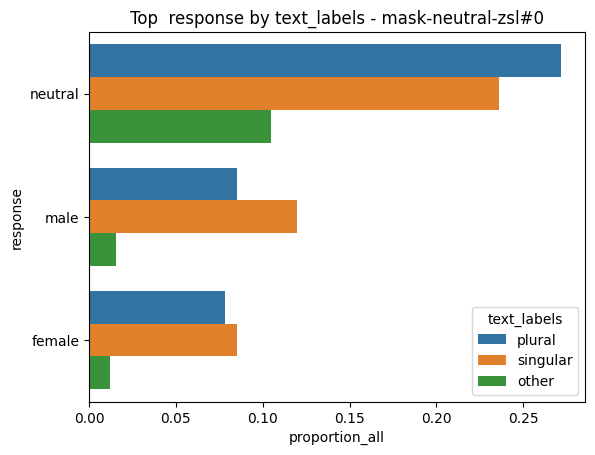

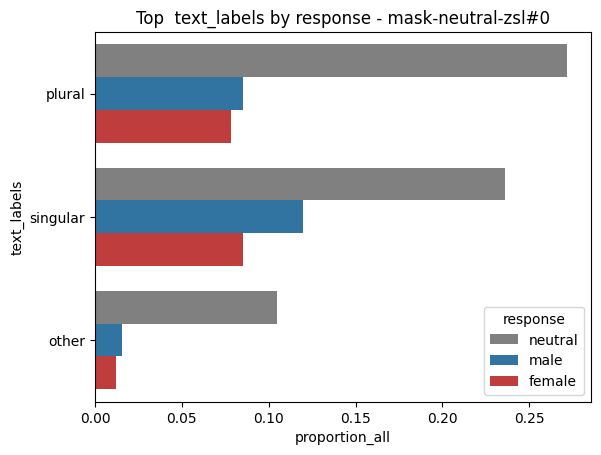

label-zsl#0


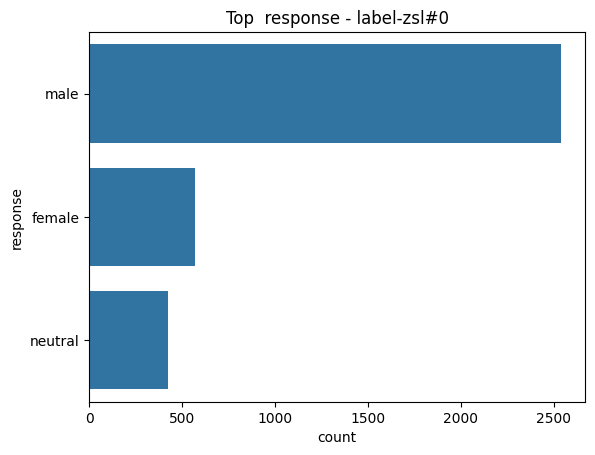

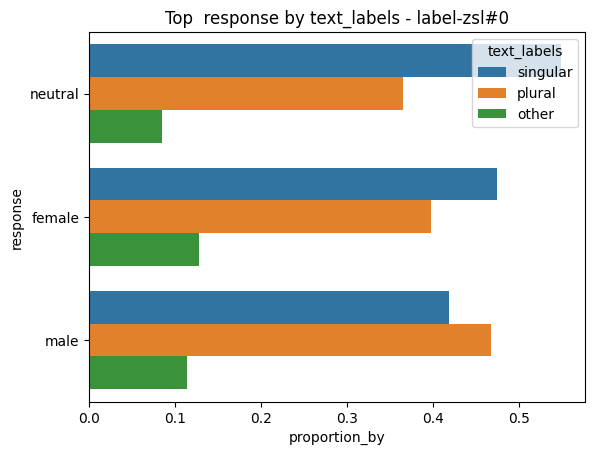

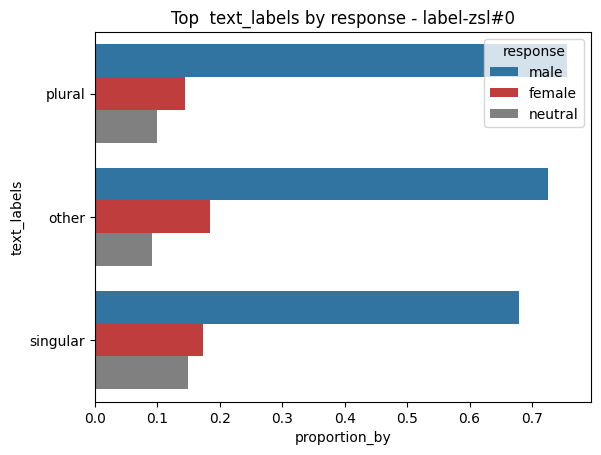

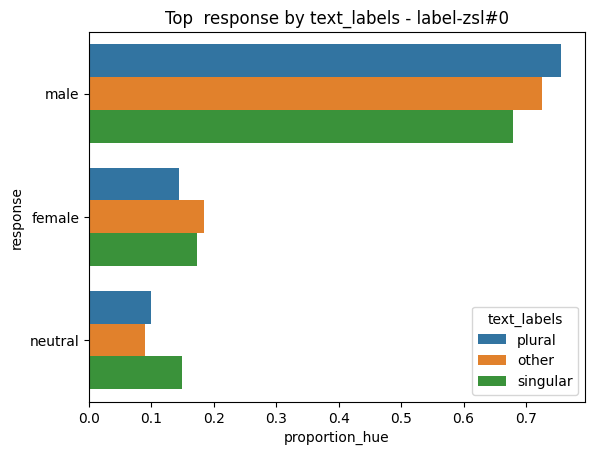

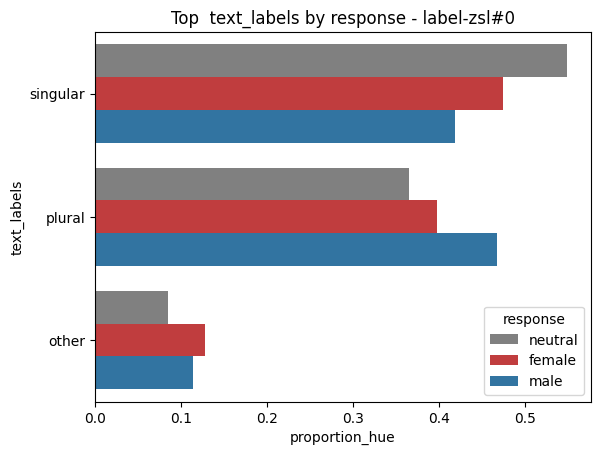

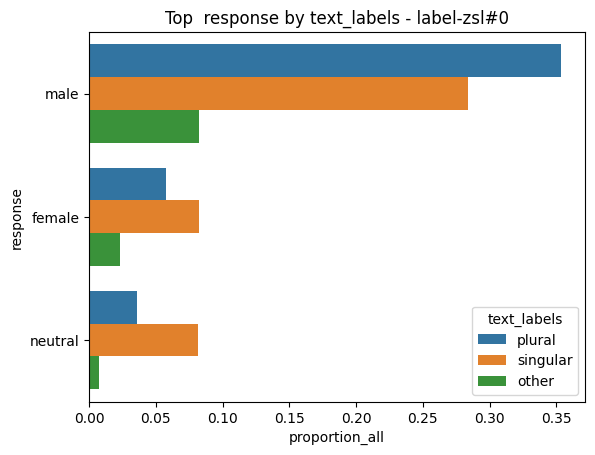

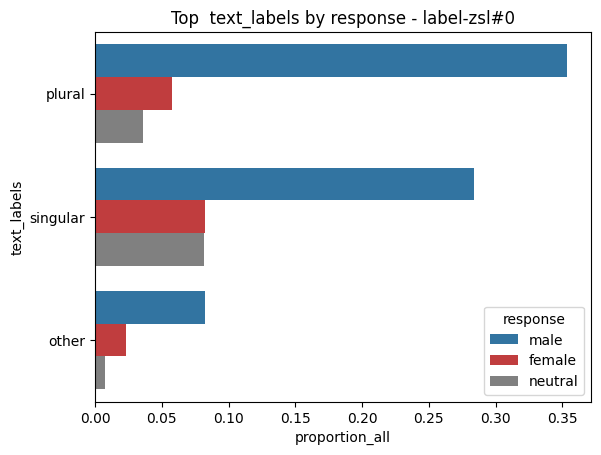

label-neutral-zsl#0


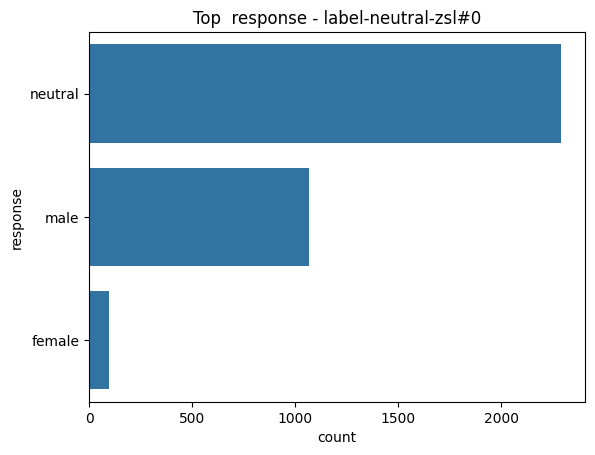

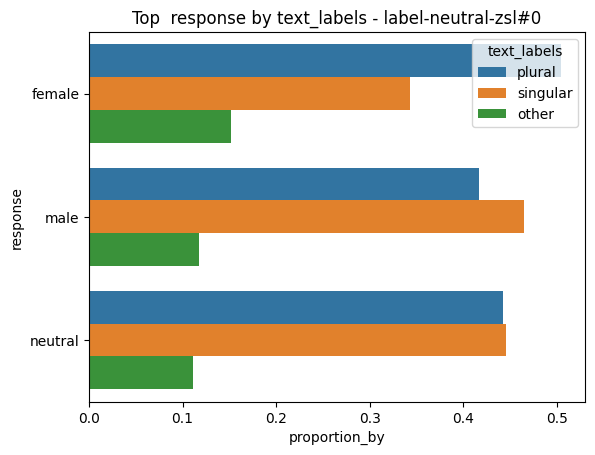

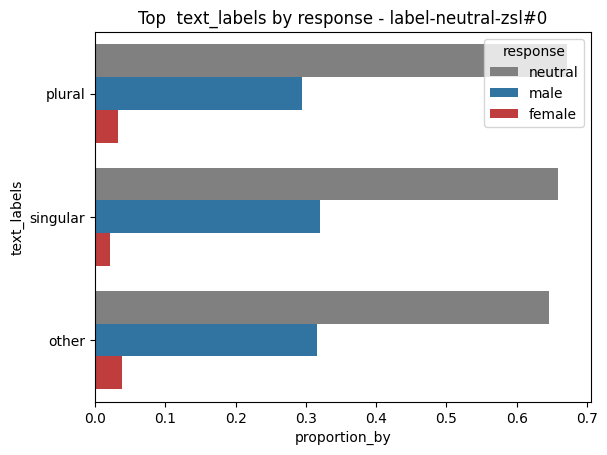

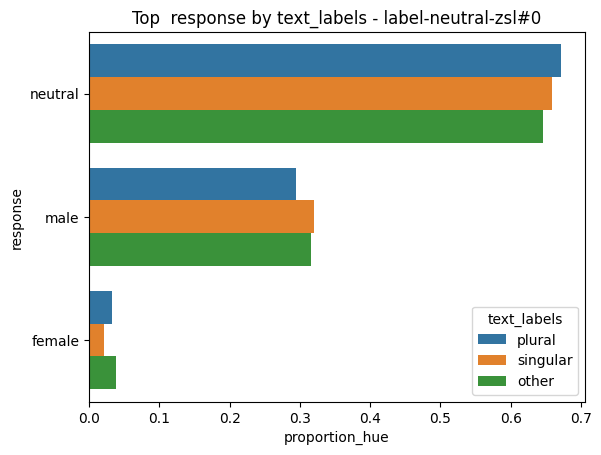

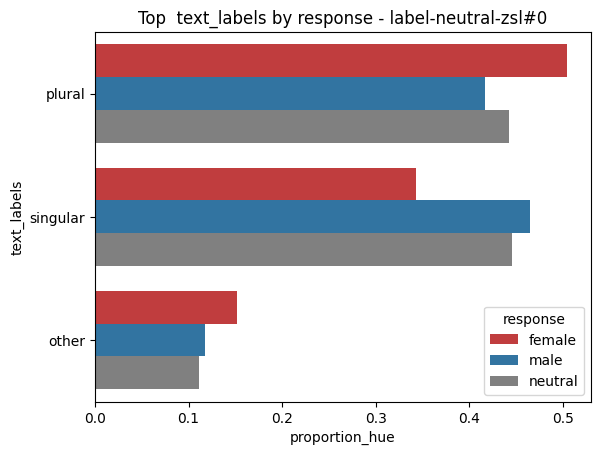

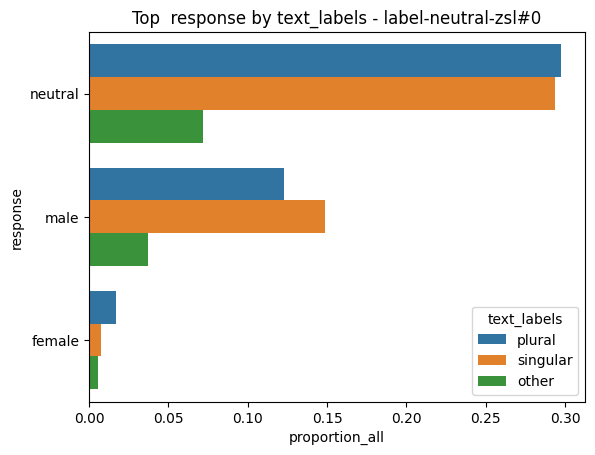

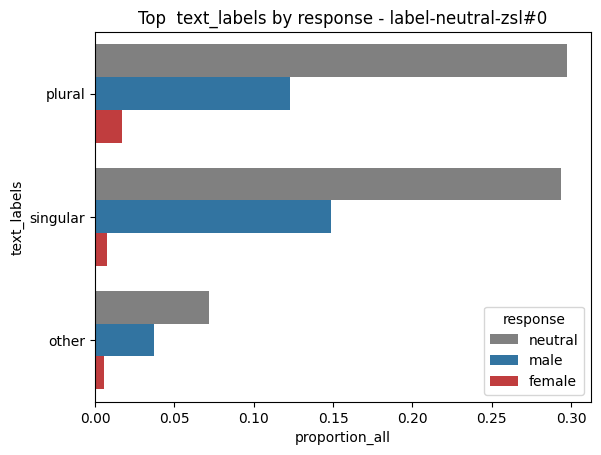

name-zsl#0


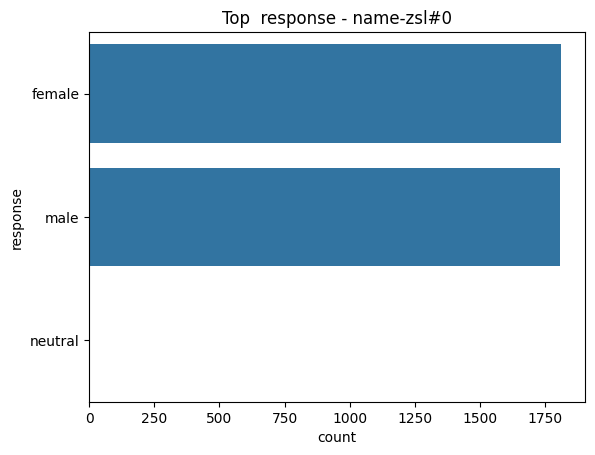

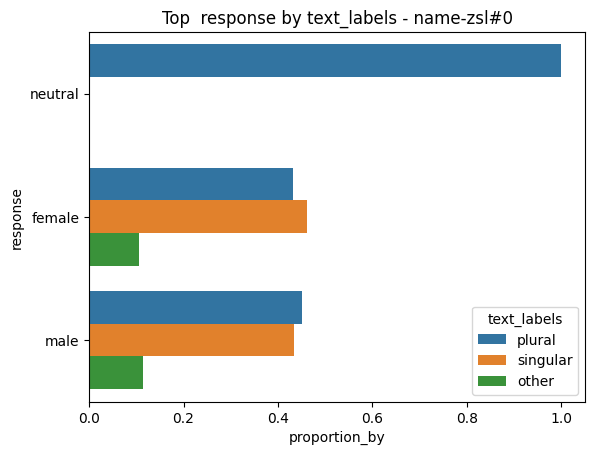

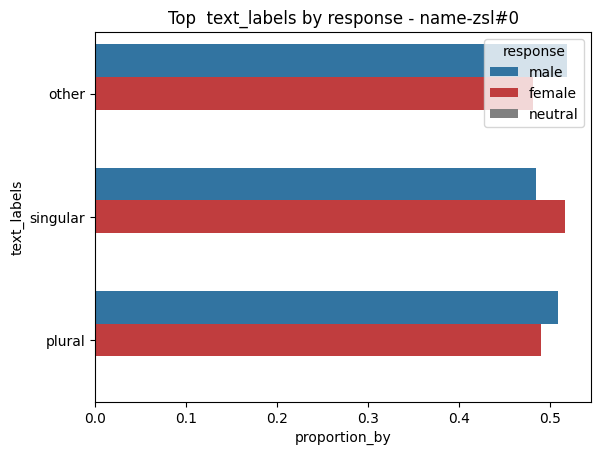

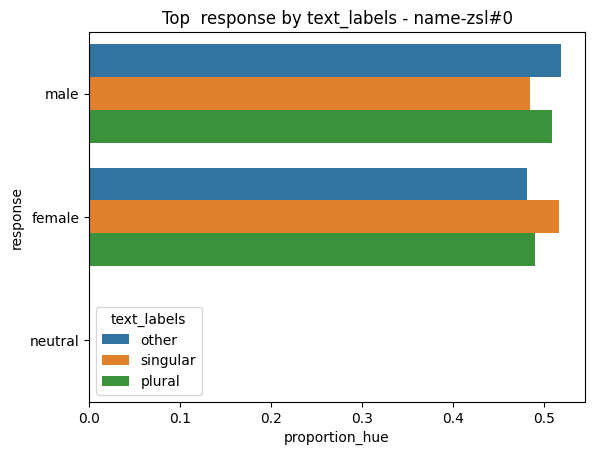

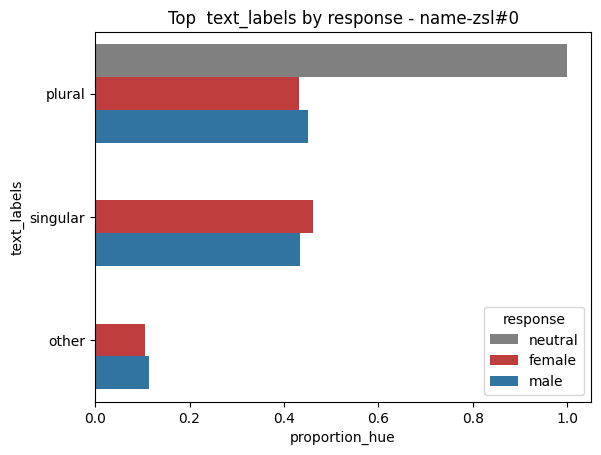

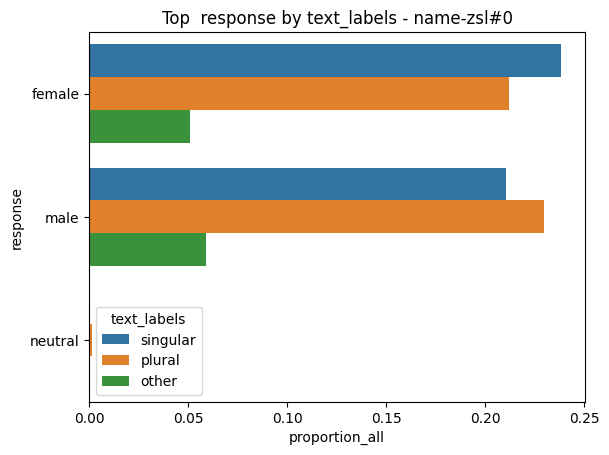

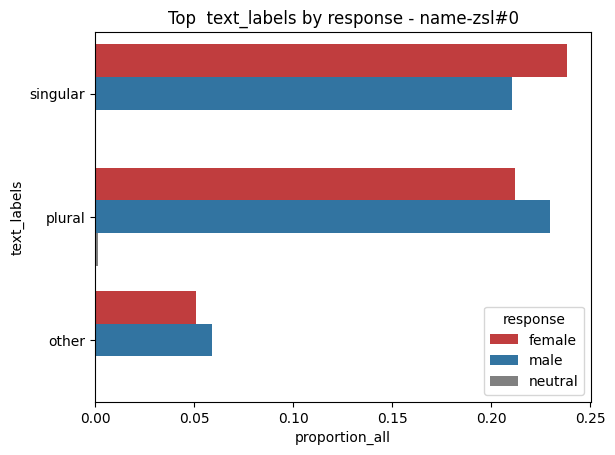

In [16]:
for p in df_norm['prompt_id'].unique():
  print(p)
  plot_df(df_filter(df_norm,'prompt_id',p), 'response', n=-1, hue='text_labels', title=p, plots='0')
  plot_df(df_filter(df_norm,'prompt_id',p), 'response', n=-1, hue='text_labels', title=p, plots='2', count='proportion_by')
  plot_df(df_filter(df_norm,'prompt_id',p), 'text_labels', n=-1, hue='response', title=p, plots='2', count='proportion_by')
  plot_df(df_filter(df_norm,'prompt_id',p), 'response', n=-1, hue='text_labels', title=p, plots='2', count='proportion_hue')
  plot_df(df_filter(df_norm,'prompt_id',p), 'text_labels', n=-1, hue='response', title=p, plots='2', count='proportion_hue')
  plot_df(df_filter(df_norm,'prompt_id',p), 'response', n=-1, hue='text_labels', title=p, plots='2', count='proportion_all')
  plot_df(df_filter(df_norm,'prompt_id',p), 'text_labels', n=-1, hue='response', title=p, plots='2', count='proportion_all')